In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
dataset = pd.read_csv("dataset/Mall_Customers.csv")
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
X = dataset[["Spending Score (1-100)","Annual Income (k$)"]]
scaler = StandardScaler()
x_scaler = scaler.fit_transform(X)

In [13]:
x_scaler

array([[-0.43480148, -1.73899919],
       [ 1.19570407, -1.73899919],
       [-1.71591298, -1.70082976],
       [ 1.04041783, -1.70082976],
       [-0.39597992, -1.66266033],
       [ 1.00159627, -1.66266033],
       [-1.71591298, -1.62449091],
       [ 1.70038436, -1.62449091],
       [-1.83237767, -1.58632148],
       [ 0.84631002, -1.58632148],
       [-1.4053405 , -1.58632148],
       [ 1.89449216, -1.58632148],
       [-1.36651894, -1.54815205],
       [ 1.04041783, -1.54815205],
       [-1.44416206, -1.54815205],
       [ 1.11806095, -1.54815205],
       [-0.59008772, -1.50998262],
       [ 0.61338066, -1.50998262],
       [-0.82301709, -1.43364376],
       [ 1.8556706 , -1.43364376],
       [-0.59008772, -1.39547433],
       [ 0.88513158, -1.39547433],
       [-1.75473454, -1.3573049 ],
       [ 0.88513158, -1.3573049 ],
       [-1.4053405 , -1.24279661],
       [ 1.23452563, -1.24279661],
       [-0.7065524 , -1.24279661],
       [ 0.41927286, -1.24279661],
       [-0.74537397,

In [14]:
inertia = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i,random_state=42)
    kmean.fit(x_scaler)
    inertia.append(kmean.inertia_)
inertia

[400.00000000000006,
 270.70426664306717,
 157.70400815035944,
 108.92131661364357,
 65.56840815571681,
 55.057348270385994,
 44.91118554999014,
 37.73640346254161,
 32.37525368158287,
 29.090568897369717]

In [16]:
import matplotlib.pyplot as plt

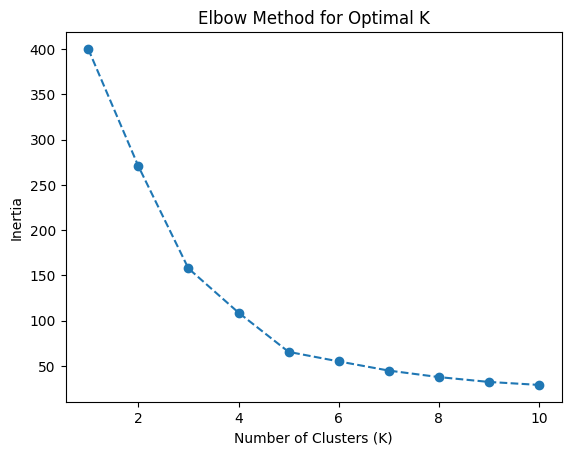

In [17]:
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

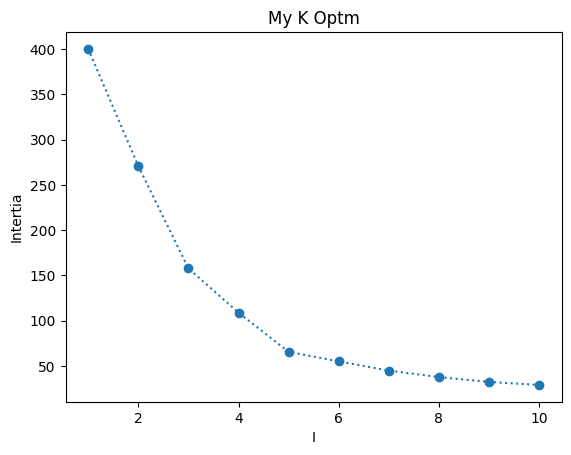

In [20]:
plt.plot(range(1,11),inertia,marker="o",linestyle=":")
plt.title("My K Optm")
plt.xlabel("I")
plt.ylabel("Intertia")
plt.show()

In [37]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_scaler)
dataset["Cluster"] = kmeans.labels_
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [38]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaler)
x_pca

array([[-1.53710920e+00, -9.22207047e-01],
       [-3.84167666e-01, -2.07514858e+00],
       [-2.41600197e+00,  1.06654468e-02],
       [-4.66981759e-01, -1.93835476e+00],
       [-1.45567848e+00, -8.95678311e-01],
       [-4.67442886e-01, -1.88391391e+00],
       [-2.36202224e+00,  6.46451712e-02],
       [ 5.36647757e-02, -2.35104185e+00],
       [-2.41738535e+00,  1.73988000e-01],
       [-5.23267116e-01, -1.72013023e+00],
       [-2.11542447e+00, -1.27972877e-01],
       [ 2.17909582e-01, -2.46130693e+00],
       [-2.06098362e+00, -1.28434004e-01],
       [-3.59022310e-01, -1.83039531e+00],
       [-2.11588560e+00, -7.35320262e-02],
       [-3.04120332e-01, -1.88529729e+00],
       [-1.48497398e+00, -6.50463918e-01],
       [-6.33993325e-01, -1.50144457e+00],
       [-1.59570019e+00, -4.31778261e-01],
       [ 2.98418042e-01, -2.32589649e+00],
       [-1.40400439e+00, -5.69494332e-01],
       [-3.60866817e-01, -1.61263191e+00],
       [-2.20054420e+00,  2.81025195e-01],
       [-3.

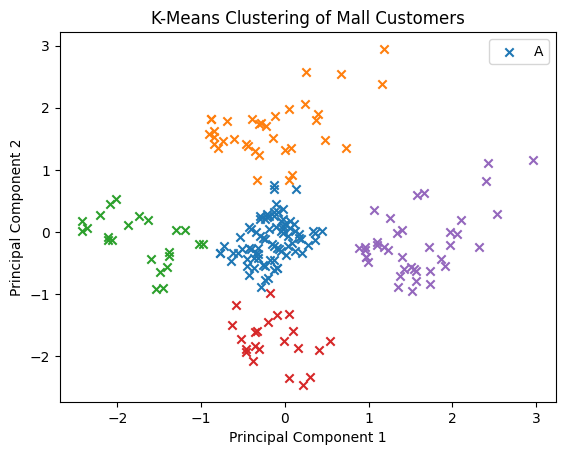

In [44]:
for cls in range(k):
    plt.scatter(x_pca[dataset["Cluster"] == cls, 0], x_pca[dataset["Cluster"] == cls, 1], label=f"Cluster {cls+1}",marker="x")
    
plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend("A")
plt.show()